In [1]:
# Import libraries and dependencies
import os
import requests
import json
import pandas as pd
import alpaca_trade_api as tradeapi
import seaborn as sns
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()


%matplotlib inline

In [2]:
#read ETH prices into data  
df_eth = pd.read_csv("Resources/ETH-USD.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
df_eth.sort_index().dropna()
df_eth.isnull().sum()
df_eth = df_eth.dropna()
df_eth = df_eth.rename(columns={'Close': 'close'})
df_eth.columns = pd.MultiIndex.from_product([['ETH'],df_eth.columns])
df_eth.head()

ETH                                                 
               Open     High      Low    close Adj Close      Volume
Date                                                                
2016-05-30  12.3253  12.8806  12.2658  12.7253   12.7253  14733800.0
2016-05-31  12.7435  14.2673  12.6422  14.0773   14.0773  42433400.0
2016-06-01  14.1098  14.3155  13.4389  14.0015   14.0015  22471300.0
2016-06-02  13.9917  14.0484  13.6292  13.7380   13.7380  10477200.0
2016-06-03  13.7429  13.8738  13.2543  13.8467   13.8467  22981500.0

In [3]:
#Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_eth,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

ETH                                                   \
               Open     High      Low    close Adj Close      Volume   
Date                                                                   
2016-05-30  12.3253  12.8806  12.2658  12.7253   12.7253  14733800.0   
2016-05-31  12.7435  14.2673  12.6422  14.0773   14.0773  42433400.0   
2016-06-01  14.1098  14.3155  13.4389  14.0015   14.0015  22471300.0   
2016-06-02  13.9917  14.0484  13.6292  13.7380   13.7380  10477200.0   
2016-06-03  13.7429  13.8738  13.2543  13.8467   13.8467  22981500.0   

                         
           daily_return  
Date                     
2016-05-30          NaN  
2016-05-31     0.106245  
2016-06-01    -0.005385  
2016-06-02    -0.018819  
2016-06-03     0.007912

In [4]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.025416,0.992872,1.013244,0.954775,1.141016,0.996120,1.081418,0.958371,1.072459,0.992749,...,0.970686,1.028957,1.034911,0.956927,0.898524,0.978866,1.023336,0.975645,0.941714,1.019643
2,1.040191,0.946238,1.069103,0.992834,1.001420,0.980122,1.131594,1.012895,1.044210,1.038890,...,0.984999,0.981915,1.177025,0.876598,0.961187,0.980950,0.966862,1.001790,0.991315,0.979406
3,1.123660,1.016472,1.009475,0.930075,0.861078,0.934122,1.123305,1.006560,1.047248,1.011441,...,0.970712,0.899692,1.085920,0.903512,0.953379,0.915685,0.904012,0.865197,1.006900,0.961447
4,1.158940,1.086807,0.936363,0.916533,0.832701,0.906459,1.157497,0.994829,1.019009,0.888338,...,0.949703,0.900664,0.971110,0.955536,0.937663,0.860666,0.812208,0.850669,1.076519,0.886814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,60.006960,48.591107,3.930410,4.329683,126.364040,8.886730,42.654448,62.385145,4.317669,7.584474,...,120.724896,466.969369,774.917129,224.003211,82.948369,22.663953,157.428632,14.736206,1.311641,15.675005
1257,55.669611,52.432149,3.958107,4.147815,128.237334,8.974754,46.869395,59.405538,4.411410,7.613689,...,114.488722,540.686064,813.402535,238.947112,80.562689,23.651232,155.948118,14.220627,1.315074,16.334612
1258,57.544338,50.868849,3.891035,4.470679,122.967013,9.475764,47.839649,57.207586,4.117562,7.932226,...,111.544178,569.479211,922.592501,229.270895,81.061199,24.069316,157.479148,13.414361,1.277176,17.533955
1259,59.633559,50.972635,4.142366,4.256964,121.751874,9.445896,49.438375,51.365802,4.062216,7.151459,...,122.258649,579.061558,948.934716,225.198817,87.789258,25.139042,151.623381,14.318643,1.304828,16.882432


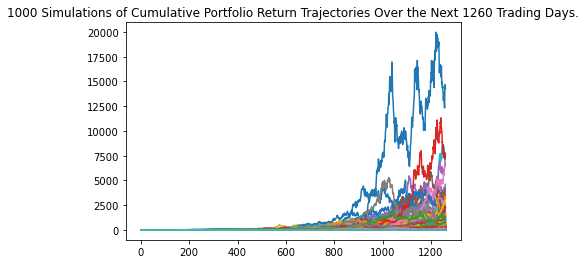

In [5]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

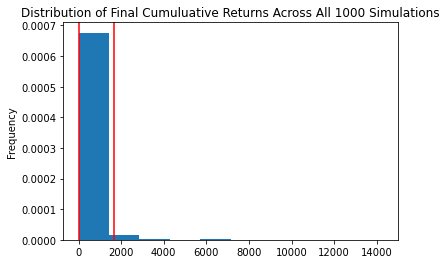

In [6]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [7]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count            1000.000000
mean              237.009083
std               767.176956
min                 0.058731
25%                 9.374024
50%                35.879837
75%               159.429966
max             14285.524615
95% CI Lower        0.764631
95% CI Upper     1665.772202
Name: 1260, dtype: float64


In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $11469.47 and $24986583.02.


In [9]:
#read ETH prices into data  
df_eth = pd.read_csv("Resources/ETH-USD.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
df_eth.sort_index().dropna()
df_eth.isnull().sum()
df_eth = df_eth.dropna()
df_eth = df_eth.rename(columns={'Close': 'close'})
# df_eth.columns = pd.MultiIndex.from_product([['ETH'],df_eth.columns])
df_eth.head()

,Open,High,Low,close,Adj Close,Volume
Date,,,,,,
2016-05-30,12.3253,12.8806,12.2658,12.7253,12.7253,14733800.0
2016-05-31,12.7435,14.2673,12.6422,14.0773,14.0773,42433400.0
2016-06-01,14.1098,14.3155,13.4389,14.0015,14.0015,22471300.0
2016-06-02,13.9917,14.0484,13.6292,13.7380,13.7380,10477200.0
2016-06-03,13.7429,13.8738,13.2543,13.8467,13.8467,22981500.0


In [10]:
#Create a new Dataframe that holds the closing price of both crypto currencies. 
new_df = pd.DataFrame({'ETH': df_eth['close']})

new_df.head()


,ETH
Date,
2016-05-30,12.7253
2016-05-31,14.0773
2016-06-01,14.0015
2016-06-02,13.7380
2016-06-03,13.8467


In [11]:
#Calculations
new_df.describe()

,ETH
count,1822.000000
mean,405.126592
std,569.070162
min,6.821660
25%,132.659405
50%,224.554489
75%,415.890595
max,4168.701172


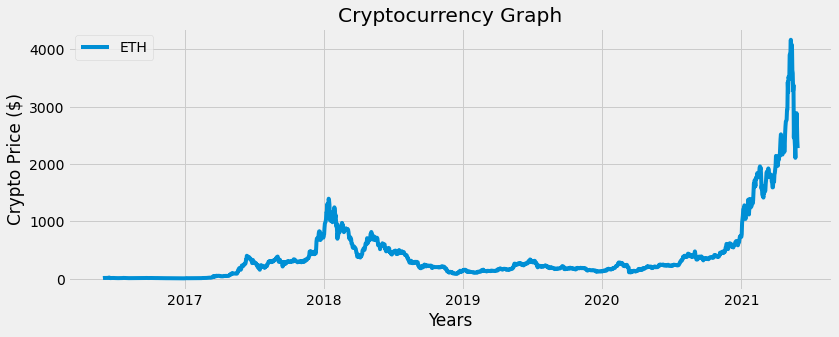

In [12]:
plt.style.use('fivethirtyeight')

my_crypto = new_df
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Years')
plt.ylabel('Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')

In [13]:
new_df.pct_change().isnull().sum()

new_df1 = new_df.pct_change().dropna()
new_df1.head()

,ETH
Date,
2016-05-31,0.106245
2016-06-01,-0.005385
2016-06-02,-0.018819
2016-06-03,0.007912
2016-06-04,-0.007677


In [14]:
print('The cryptocurrency Volatility:')
new_df1.std()


The cryptocurrency Volatility:


ETH    0.057331
dtype: float64

In [15]:
#Statistic on the data
new_df1.describe()

,ETH
count,1821.000000
mean,0.004497
std,0.057331
min,-0.423472
25%,-0.020692
50%,0.000806
75%,0.027518
max,0.336621


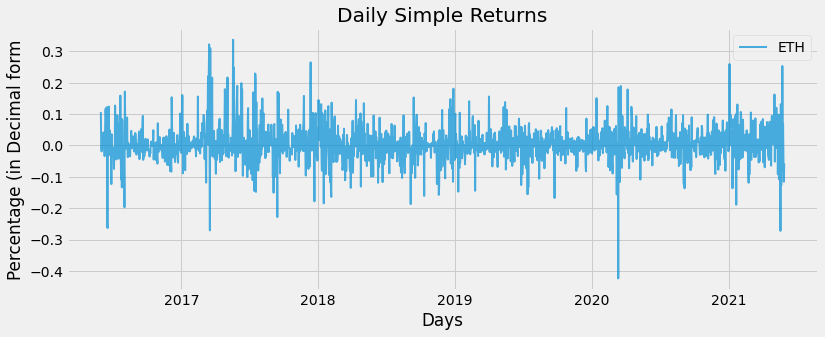

In [16]:
plt.figure(figsize=(12, 4.5))

for c in new_df1.columns.values:
    plt.plot(new_df1.index, new_df1[c], label = c, lw = 2, alpha = .7)
    
plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in Decimal form')
plt.xlabel('Days')
plt.legend(new_df1.columns.values, loc= 'upper right')
plt.show()

In [17]:
#Get the daily cumulative simple returns
DCSR = (new_df1+15000).cumprod()

DCSR

,ETH
Date,
2016-05-31,1.500011e+04
2016-06-01,2.250015e+08
2016-06-02,3.375018e+12
2016-06-03,5.062530e+16
2016-06-04,7.593792e+20
...,...
2021-05-25,inf
2021-05-26,inf
2021-05-27,inf


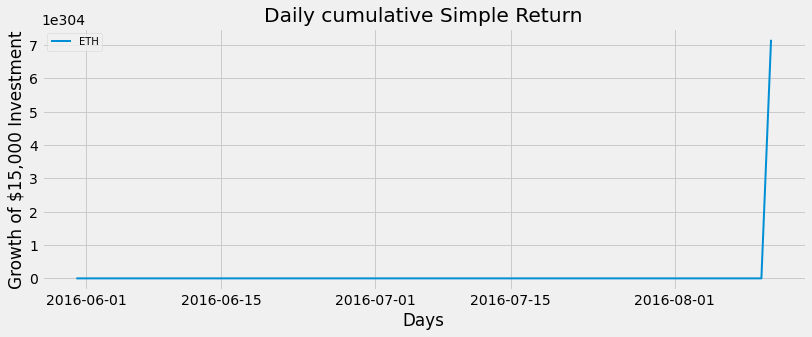

In [18]:
#Visualize the daily cumulative simple returns
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
    plt.plot(DCSR.index, DCSR[c], lw=2, label= c)
    
plt.title('Daily cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $15,000 Investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()